In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re 
import warnings 
warnings.filterwarnings("ignore")

In [11]:
data=data=pd.read_csv("123.csv")
data

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 32757-32758: unexpected end of data

In [ ]:
data.shape

(10585, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10585 entries, 0 to 10584
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10585 non-null  object
 1   Language  10585 non-null  object
dtypes: object(2)
memory usage: 165.5+ KB


In [ ]:
data.isnull().sum()

Text        0
Language    0
dtype: int64

In [ ]:
len(data[data.duplicated()])

80

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(10505, 2)

In [ ]:
data["Language"].nunique()

37

In [ ]:
data["Language"].value_counts()

English                1382
French                 1007
Spanish                 816
Portugeese              736
Italian                 694
Russian                 688
Sweedish                673
Malayalam               591
Dutch                   542
Arabic                  532
Turkish                 471
German                  465
Tamil                   464
Danish                  424
Kannada                 366
Greek                   358
Telugu                   86
Hindi                    62
Marathi                  18
Punjabi                  16
Odia                     13
Urdu                     12
Assamese                 10
Gujarathi                10
Telugu                   10
Sanskrit                 10
Santali (ol chiki)        9
Odia                      7
Bengali                   7
Urdu                      6
Sanskrit                  5
Assamese                  4
Gujarathi                 3
Bengali                   3
Marathi                   2
Assamese            

In [ ]:
language=data["Language"].value_counts().reset_index()

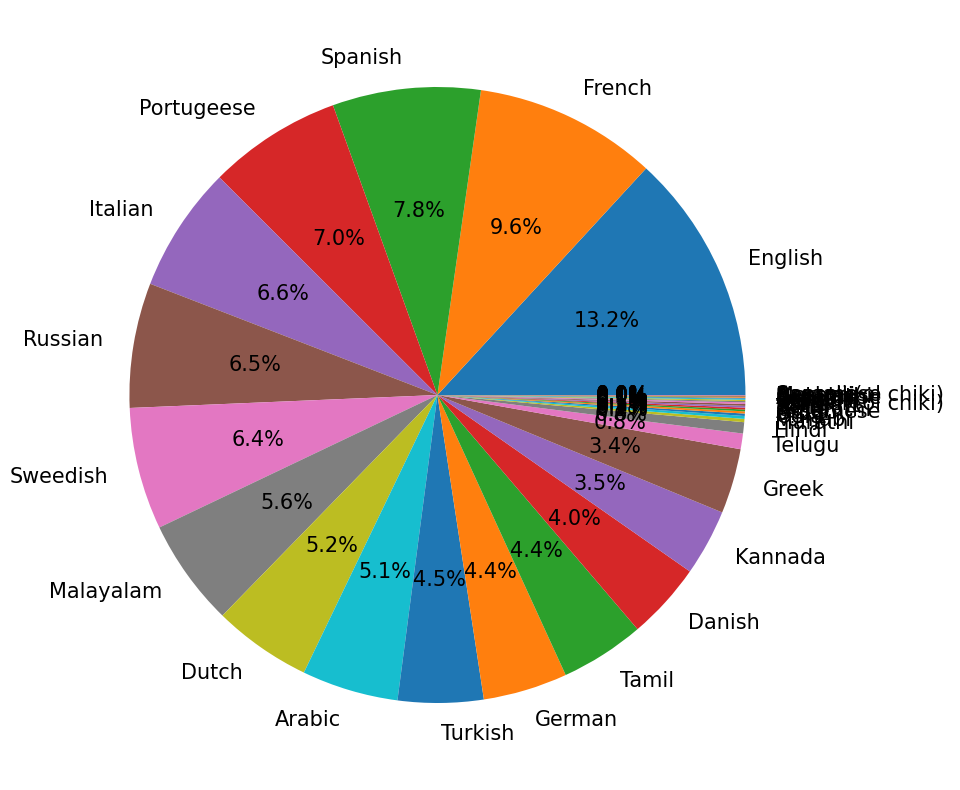

In [ ]:
plt.figure(figsize=(20,10))
labels=language['index']
plt.pie(language["Language"],labels=labels,autopct='%.1f%%', textprops={'fontsize':15})
plt.show()

In [ ]:
data1=data.copy()
data1["cleaned_Text"]=" "
data1

,Text,Language,cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,
1,"""Nature"" can refer to the phenomena of the phy...",English,
2,"The study of nature is a large, if not the onl...",English,
3,"Although humans are part of nature, human acti...",English,
4,[1] The word nature is borrowed from the Old F...,English,
...,...,...,...
10580,వారు అంతా కలయజూస్తూ అనేక అవాంతరాలను అధిగమించి ...,Telugu,
10581,ఆపై దిక్కు తోచకవారు శోకంలో మునిగిపోయిన వారికి ...,Telugu,
10582,ఇక నూరు యోజనాల విస్తీర్ణమున్న సముద్రాన్ని దాటి...,Telugu,
10583,అప్పుడు జాంబవంతుడు ఈ కార్యానికి హనుమంతుడే సమర్...,Telugu,


In [ ]:
def clean_func(Text):
    Text=re.sub(r'[\([{})\]!@#$,"%^*?:;~`0-9]', ' ', Text)
    
    Text=Text.lower()
    
    Text=re.sub('#|S+', ' ',Text)
    
    return Text

In [ ]:
data1["cleaned_Text"]=data1["Text"].apply(lambda x: clean_func(x))
data1

,Text,Language,cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,nature in the broadest sense is the natural...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature can refer to the phenomena of the phy...
2,"The study of nature is a large, if not the onl...",English,the study of nature is a large if not the onl...
3,"Although humans are part of nature, human acti...",English,although humans are part of nature human acti...
4,[1] The word nature is borrowed from the Old F...,English,the word nature is borrowed from the old f...
...,...,...,...
10580,వారు అంతా కలయజూస్తూ అనేక అవాంతరాలను అధిగమించి ...,Telugu,వారు అంతా కలయజూస్తూ అనేక అవాంతరాలను అధిగమించి ...
10581,ఆపై దిక్కు తోచకవారు శోకంలో మునిగిపోయిన వారికి ...,Telugu,ఆపై దిక్కు తోచకవారు శోకంలో మునిగిపోయిన వారికి ...
10582,ఇక నూరు యోజనాల విస్తీర్ణమున్న సముద్రాన్ని దాటి...,Telugu,ఇక నూరు యోజనాల విస్తీర్ణమున్న సముద్రాన్ని దాటి...
10583,అప్పుడు జాంబవంతుడు ఈ కార్యానికి హనుమంతుడే సమర్...,Telugu,అప్పుడు జాంబవంతుడు ఈ కార్యానికి హనుమంతుడే సమర్...


In [ ]:
x=data1["cleaned_Text"]
y=data1["Language"]

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y=encoder.fit_transform(y)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
CV=CountVectorizer()
X=CV.fit_transform(x).toarray()

In [ ]:
X.shape

(10505, 40308)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
models={"M_Naive_Bayes": MultinomialNB(), 
        "Random_Forest" : RandomForestClassifier(),
       "K_Nearest_Neighbor": KNeighborsClassifier()}

In [ ]:
for name, model in models.items():
    print( f'{name} training started... ')
    model.fit(X_train,y_train)
    print( f'{name} trainied.')

M_Naive_Bayes training started... 
M_Naive_Bayes trainied.
Random_Forest training started... 
Random_Forest trainied.
K_Nearest_Neighbor training started... 
K_Nearest_Neighbor trainied.


In [ ]:
for name in models:
    acc_score=accuracy_score(y_test, models.get(name).predict(X_test))
    print(f'{name} accuracy score:{acc_score}')

M_Naive_Bayes accuracy score:0.9733536353254663
Random_Forest accuracy score:0.9242481918538257
K_Nearest_Neighbor accuracy score:0.5161781499809669


In [ ]:
def prediction(text):
    x=CV.transform([text]).toarray()
    lang=model.predict(x)
    lang=encoder.inverse_transform(lang)
    print("The language is in",lang[0])

In [ ]:
prediction("ବଶତଃ ଆମକୁ ଗଭୀର")

The language is in Kannada


In [ ]:
prediction("The study of nature is a large, if not the onl ")

The language is in English


In [ ]:
prediction("ᱤ ᱫᱚ ᱚᱞᱪᱤᱠᱤ ᱨᱮᱭᱟᱜ ᱜᱮᱢᱤᱫᱟᱜ ᱟᱠᱷᱚᱨ ᱠᱟᱱᱟ ")

The language is in Kannada


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=42)
X_unigram_train, X_unigram_test = normalizeData(X_train, X_test)
y_predict_nb_unigram = applyNaiveBayes(X_unigram_train, y_train, X_unigram_test)
plot_F_Scores(y_test, y_predict_nb_unigram)
plot_Confusion_Matrix(y_test, y_predict_nb_unigram, "Oranges")

In [ ]:
prediction("ᱤ ᱫᱚ ᱚᱞᱪᱤᱠᱤ ᱨᱮᱭᱟᱜ ᱜᱮᱢᱤᱫᱟᱜ ᱟᱠᱷᱚᱨ ᱠᱟᱱᱟ ")

The language is in Kannada


In [ ]:
prediction("ᱤ ᱫᱚ ᱚᱞᱪᱤᱠᱤ ᱨᱮᱭᱟᱜ ᱜᱮᱢᱤᱫᱟᱜ ᱟᱠᱷᱚᱨ ᱠᱟᱱᱟ ")

The language is in Kannada
